# Machine Exercise 2
### By: Jeryl Salas
Text tokenizer with Byte-Pair Encoding (BPE) and compared with Wordpiece Tokenizer.


In [8]:
import numpy as np # For defining range of K values
import matplotlib.pyplot as plt # For creating a line chart on how vocabulary size increases and number of tokens decreases as we increase the number of merges, K
import os # For folder and file path opening
import re # Used for word segmentation
import json # Used for loading JSON data
import random # For random selection of JSON files for training
import itertools # For slicing a part of splitted words dictionary for printing
import pandas as pd # For transforming JSON data into a pandas dataframe
import time # For checking the duration of the tokenizers
from collections import Counter, defaultdict

import numpy as np # For defining range of K values
import os # For folder and file path opening
import re # Used for word segmentation
import json # Used for loading JSON data
import random # For random selection of JSON files for training
from sklearn.model_selection import train_test_split
import pandas as pd # For transforming JSON data into a pandas dataframe
import nltk
nltk.download('punkt')

In [9]:
# Load JSON data for training
folder_path = r'C:\Users\Jeryl Salas\Documents\AI 351\MEx 2 Tokenizer\coleridgeinitiative-show-us-the-data\train'  
files = [file for file in os.listdir(folder_path) if file.endswith('.json')]
selected_files = random.sample(files, 1000)
loaded_data = []

for file_name in selected_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file) # Load JSON data
            loaded_data.append(data)
            print(f"successfully loaded {file_name}.JSON") # Print for checking
    except (json.JSONDecodeError, FileNotFoundError) as e:
        print(f"error loading {file_name}: {e}")


pd.set_option('display.max_colwidth', 100)  
pd.set_option('display.width', 200)         
pd.set_option('display.max_rows', 10) 

print(f"Successffully loaded {len(loaded_data)} JSON files.")
flattened_data = [item for sublist in loaded_data for item in sublist] # Flatten data 
df = pd.DataFrame(flattened_data) # Convert to pandas dataframe

successfully loaded adf2a0cb-ccd3-4e63-b401-280600342957.json.JSON
successfully loaded 79d4ef68-9667-45cb-b1b3-32021b563916.json.JSON
successfully loaded 81a1e992-e4b3-49ae-91a8-ae233aa44d26.json.JSON
successfully loaded db004697-e0f0-40fb-88d3-6d3c1a822b2a.json.JSON
successfully loaded 03770790-d0ff-416b-b134-b410389b55c2.json.JSON
successfully loaded bbaf84d9-d4b0-47d5-826e-a9f3a7b6cfd9.json.JSON
successfully loaded cc2d4da7-55f8-40f0-90b7-b487c7bfc047.json.JSON
successfully loaded 8f68d7b3-a59e-4269-8be5-650cadb4760b.json.JSON
successfully loaded 37cd76bd-2a19-4075-82b9-16918dc2c22e.json.JSON
successfully loaded afc17d1a-7ef0-42f2-a81d-72fb5bf23e7b.json.JSON
successfully loaded e3c8d58a-0e30-44e1-8847-eeaa5de6e931.json.JSON
successfully loaded 44bdcbf0-5875-4e57-9ede-e5d08f94def3.json.JSON
successfully loaded 421975bc-1e17-4018-b3ea-5c5d6a146806.json.JSON
successfully loaded 1a216f54-9c89-4565-9575-c3cd9ec9dffd.json.JSON
successfully loaded 14c705c8-6f63-42b8-96f4-bd8bc2b629ef.json.

In [10]:
print(df.sample(10, random_state=42)) # Print examples

                                                                                       section_title  \
7794                                                                                    Introduction   
1147                                                             Data included in the analysis of AD   
9412                                                   Parent Race/Ethnicity (P7HDRACE and P7HMRACE)   
8704                                                                                     Citizenship   
14456                                                                         The Illustrative Study   
16274                                                                                 Study 2 sample   
16672                                                                        Environmental variables   
5268                                                                                                   
6118   The Effects of Management Practices on Grassland Birds-La

In [ ]:
combined_text = ' '.join(df['text']) # Combine into a single text for training
print(combined_text)

In [12]:
def sentence_segmentation(text):    
    """
    splits the whole training text into sentences using regex
    """
    sentence_pattern = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s'  # Considers the use of punctuation marks followed by a space but doesn't include periods whithin abbreviations
    sentences = re.split(sentence_pattern, text)
    return sentences

def word_tokenizer(sentence):
    """
    Splits sentences into words and punctuations but also considers non-word symbols so that we can consider punctuations as symbols as well
    """
    word_pattern = r'\w+|[^\w\s]' # Gets words but also non-word symbols
    words = re.findall(word_pattern, sentence) 
    return words

def get_word_frequency(text):
    """
    Calls the two functions above and counts the frequency of each word on the training text
    """
    sentences = sentence_segmentation(text)
    words = [word.lower() for sentence in sentences for word in word_tokenizer(sentence)]
    frequency = Counter(words)
    return frequency

words_freq_dist = get_word_frequency(combined_text) 
print(words_freq_dist) # Print word frequency distribution

Counter({'.': 490426, ',': 466508, 'the': 415702, 'of': 252848, 'and': 240162, 'in': 181070, 'to': 163833, '-': 150525, ')': 131723, '(': 131446, 'a': 115393, 'for': 82992, 'is': 66642, 'that': 66432, 'with': 57093, 'as': 50547, '/': 49146, 'are': 46713, 'on': 44482, 'by': 37016, 'from': 36666, ':': 35765, 'this': 35392, 'were': 34759, 'or': 33468, 'be': 32582, 's': 32124, ';': 31210, 'was': 31055, "'": 29842, 'at': 26506, '1': 26212, 'we': 25884, 'not': 24955, 'data': 24117, '2': 23586, '%': 22521, '"': 22082, '[': 21425, 'an': 21344, 'have': 21306, ']': 21187, 'these': 20409, 'more': 19897, 'et': 19126, 'al': 18962, 'their': 18422, 'than': 17540, 'which': 17515, 'it': 17382, 'students': 16414, 'between': 16383, '3': 16002, '0': 15708, 'also': 15185, 'study': 14664, 'school': 14152, 'all': 14009, 'other': 13934, 'can': 13921, 'e': 13406, 'may': 13121, 'climate': 12798, 'research': 12685, '5': 12680, 'one': 12662, 'has': 12351, 'level': 12222, 'change': 12214, 'i': 12140, '4': 12122, '

In [13]:
def get_vocab(word_freq_dict):
    """
    Extracts vocabulary from word frequency dictionary
    """
    vocab = []
    for word in word_freq_dict:
        for letter in word:
            if letter not in vocab:
                vocab.append(letter)

    vocab.sort
    vocab = ["<|endoftext|>"] + vocab.copy()
    #print(f"vocabulary: {vocab}")
    return vocab

def split_words(word_freq_dict):
    """
    Splits each word in the dictionary into individual characters for BPE
    """
    splits = {word: [c for c in word] for word in word_freq_dict.keys()}
    sample_splits = dict(itertools.islice(splits.items(), 20))
    #print(f"Sample splits: {sample_splits}")
    return splits

def get_pair_frequencies(word_freq_dict, splits, merges):
    """
    Get frequency of each pair for BPE
    """
    pair_freq = defaultdict(int)
    for word, freq in word_freq_dict.items():
        split = splits[word]
        if len(split) == 1:
            continue
        for i in range(len(split) - 1):
            pair = (split[i], split[i + 1])
            pair_freq[pair] += freq
    
    # Sort pairs by frequency in descending order
    sorted_pairs = sorted(pair_freq.items(), key=lambda x: -x[1])

    count = 0
    #print("Top 10 highest pairs:")
    for pair, freq in sorted_pairs:
        if pair not in merges:
            #print(f"{pair}: {freq}")
            count += 1
        if count >= 10:
            break
    
    return pair_freq

def merge_pair(a, b, word_freq_dict, splits):
    """
    Merges the character pairs with the highest frequency passed by the byte_pair_encoding function
    """
    for word in word_freq_dict:
        split = splits[word]
        if len(split) == 1:
            continue

        i = 0
        while i < len(split) - 1:
            if split[i] == a and split[i + 1] == b:
                split = split[:i] + [a + b] + split[i + 2 :]
            else:
                i += 1
        splits[word] = split
    return splits

def byte_pair_encoding(word_freq_dict, splits, k):
    """
    Performs Byte-Pair Encoding on the input text
    """
    # C = splits
    vocab = get_vocab(word_freq_dict) # Initial set of tokens is characters, V
    merges = {}
    vocab_sizes = []
    token_counts = []
    print(f"starting BPE for k = {k}")

    for i in range(k): # Determined by the number of merges, K
        print(f"for iter, i = {i}. Starting paring...")
        pair_freqs = get_pair_frequencies(word_freq_dict, splits, merges) # t_L, t_R <-- Most frequent pair of adjacent tokens in C
        sorted_pairs = sorted(pair_freqs.items(), key=lambda x: -x[1])

        best_pair = None
        for pair, freq in sorted_pairs:
            if pair not in merges:
                best_pair = pair
                break
        
        if not best_pair:
            print("No more pairs to merge.")
            break

        splits = merge_pair(*best_pair, word_freq_dict, splits) # Replace each occurence of t_L and t_R in C with t_new
        merges[best_pair] = best_pair[0] + best_pair[1]   # t_New = t_L + t_R
        print(f"Merged \"{best_pair[0] + best_pair[1]}\". Number of merges: {len(merges)}")
        vocab.append(best_pair[0] + best_pair[1]) # V <-- V + t_New Update Vocabulary

        vocab_sizes.append(len(set(vocab))) # Store the length of V
        token_counts.append(sum(len(split) for split in splits.values())) # Store the length of tokens


    print(f"Vocabulary after BPE: {vocab}" ) # Print the vocabulary and merges after all K iterations
    print(f"Merges after BPE: {merges}")
    return merges, vocab_sizes, token_counts, vocab


def simulate_bpe_steps(max_k, step_size, text):
    """
    Simulate improvements of BPE results with different K sizes: 200, 400, 600, 800, 1000
    """
    k_values = np.arange(1, max_k + 1, step_size)
    vocab_sizes = []
    token_counts = []

    print("Simulating BPE steps...")
    words_freq_dist = get_word_frequency(text)
    # print(words_freq_dist)
    # Creating C
    splits = {word: [l for l in word] for word in words_freq_dist.keys()}
    print("done splitting...")
    print("Iterating over k values")

    for k in k_values:
        print(f"\n\n_____________________________________________\nfor K = {k-1}, performing BPE")
        merges, v_sizes, t_counts, vocab = byte_pair_encoding(words_freq_dist, splits.copy(), k)
        vocab_sizes.append(v_sizes[-1])  
        token_counts.append(t_counts[-1])  

    tokenized_text = tokenize(text, merges) # Attempt to tokenize training text after the last K value

    return k_values, vocab_sizes, token_counts, tokenized_text, merges

def plot_heap_law(k_values, vocab_sizes, token_counts):
    plt.figure(figsize=(12, 6))

    # Plot line chart Vocabulary Size (V) against Number of Merges (k)
    plt.subplot(1, 2, 1)
    plt.plot(k_values, vocab_sizes, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Merges (k)')
    plt.ylabel('Vocabulary Size (V)')
    plt.title('Vocabulary Size vs Number of Merges')

    # Plot line chart Number of Tokens (T) against Number of Merges (k)
    plt.subplot(1, 2, 2)
    plt.plot(k_values, token_counts, marker='o', linestyle='-', color='r')
    plt.xlabel('Number of Merges (k)')
    plt.ylabel('Number of Tokens (T)')
    plt.title('Number of Tokens vs Number of Merges')

    # Show charts side-by-side
    plt.tight_layout()
    plt.show()


def validate_tokenizer(tokenized_output, original_text):
    '''
    Validate tokenizer's output by comparing token counts and compression ration
    |V| = kN^B
    "The larger the corpora we look at, the more word types we find."
    The same goes with how long did we run through the corpora ( num of merges, K ).
    More specifically the number of merges performed in the BPE
    '''

    total_tokens = len(tokenized_output)
    unique_tokens = len(set(tokenized_output))
    token_counts = Counter(tokenized_output)
    original_word_count = len(original_text.split())
    compression_ratio = total_tokens / original_word_count


    print(f"Total tokens: {total_tokens}")
    print(f"Unique tokens: {unique_tokens}")
    print(f"Most common tokens: {token_counts.most_common(10)}")
    print(f"Original word count: {original_word_count}")
    print(f"Compression ratio (tokens per original word): {compression_ratio:.2f}")

    return {
        "total_tokens": total_tokens,
        "unique_tokens": unique_tokens,
        "compression_ratio": compression_ratio,
        "token_counts": token_counts
    }



def tokenize(text, merges):
    """
    Tokenizes given text with the given merge rules from training
    """
    print("Starting to tokenize...")
    words_freq_dist = get_word_frequency(text)
    print(words_freq_dist)
    splits = {word: [l for l in word] for word in words_freq_dist.keys()}
    print("done splitting...")

    for pair, merge in merges.items():
        split_items = list(splits.items())
        for word, split in split_items:
            i = 0
            while i < len(split) - 1:
                if split[i] == pair[0] and split[i + 1] == pair[1]:
                    split = split[:i] + [merge] + split[i + 2 :]
                else:
                    i += 1
            splits[word] = split

    tokenized_text = [token for split in splits.values() for token in split]
    return tokenized_text


Simulating BPE steps...
done splitting...
Iterating over k values


_____________________________________________
for K = 0, performing BPE
starting BPE for k = 1
for iter, i = 0. Starting paring...
Merged "th". Number of merges: 1
Vocabulary after BPE: ['<|endoftext|>', 'b', 'a', 'c', 'k', 'g', 'r', 'o', 'u', 'n', 'd', ':', 'w', 'e', 'p', 'v', 'i', 's', 'l', 'y', 't', '(', '1', '0', '5', '2', 'm', ')', 'f', ',', 'h', '-', 'β', '3', '.', '4', 'q', 'z', "'", 'x', '9', '8', '≥', '7', '%', '6', '[', ']', ';', '/', 'γ', '=', 'ε', 'j', '±', '×', '+', '−', '"', '<', '~', '$', '≤', 'µ', '\uf061', '>', 'ń', '≈', '{', '}', '?', '&', '⌊', '⌋', '∈', '…', '∼', 'τ', '_', 'σ', 'χ', '°', '|', 'ñ', '¼', 'à', '\\', '!', 'é', 'á', '®', '•', 'ψ', 'ω', 'θ', 'φ', 'π', '√', 'α', '#', 'ı', 'ç', '©', 'è', 'å', '*', 'ρ', '≠', '›', 'ï', '½', 'λ', 'ն', 'ͻ', 'ü', 'í', 'ϫ', 'ϭ', 'ä', 'ö', 'ϩ', '⌬', 'ó', 'ª', '∆', '¢', '‡', 'ʻ', '†', 'û', '§', 'њ', 'δ', '‰', 'ϕ', 'ⅰ', 'ⅱ', 'ⅲ', '@', '␤', 'μ', '^', '∇', '→', '∞', '∂

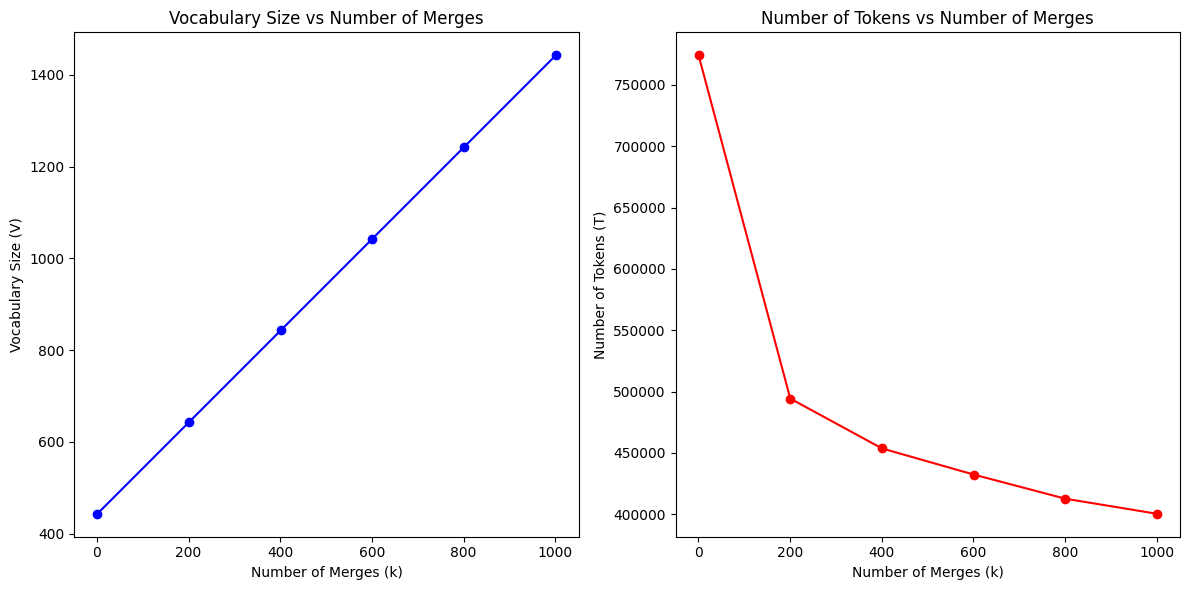

Total tokens: 400437
Unique tokens: 1441
Most common tokens: [('s', 8711), ('a', 6632), ('c', 6011), ('b', 5824), ('k', 5771), ('l', 5499), ('o', 5429), ('t', 5251), ('m', 5222), ('g', 5074)]
Original word count: 7314051
Compression ratio (tokens per original word): 0.05


In [14]:
# Train bottom-up tokenizer with different K sizes: 200, 400, 600, 800, 1000 and display results
max_k = 1200
step_size = 200 
k_values, vocab_sizes, token_counts, tokenized_text, merges = simulate_bpe_steps(max_k, step_size, combined_text)
plot_heap_law(k_values, vocab_sizes, token_counts)
results = validate_tokenizer(tokenized_text, combined_text)

## Testing Tokenizer
We test and compare the BPE tokenizer with the pre-trained wordpiece tokenizer using the test JSON files provided

In [ ]:
# Load Testing Dataset
print("Loading test JSON files")
folder_path = r'C:\Users\Jeryl Salas\Documents\AI 351\MEx 2 Tokenizer\coleridgeinitiative-show-us-the-data\test'  
files = [file for file in os.listdir(folder_path) if file.endswith('.json')]

loaded_data = []

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            loaded_data.append(data)
            print(f"successfully loaded {file_name}.JSON")
    except (json.JSONDecodeError, FileNotFoundError) as e:
        print(f"error loading {file_name}: {e}")


pd.set_option('display.max_colwidth', 100)  
pd.set_option('display.width', 200)         
pd.set_option('display.max_rows', 10) 

print(f"Successffully loaded {len(loaded_data)} JSON files.")
flattened_data = [item for sublist in loaded_data for item in sublist]
df = pd.DataFrame(flattened_data)
testing_text = ' '.join(df['text'])
print(testing_text)

In [16]:
# Show the performance/results of the bottom-up tokenizer with BPE using a sample text of less than 512 characters
start_time = time.time()
tokenized_text = tokenize(testing_text, merges)
end_time = time.time()
result = validate_tokenizer(tokenized_text, testing_text)
tokenizer_time = end_time - start_time
print(f"Built Tokenizer Time: {tokenizer_time:.6f} seconds")

Starting to tokenize...
Counter({'the': 3138, ',': 2834, '.': 2604, 'of': 1802, 'and': 1684, 'in': 1660, 'to': 1151, '-': 1002, '(': 989, ')': 987, 'a': 735, 'for': 601, 'at': 468, 'education': 460, 'that': 431, 'percent': 367, 'with': 351, 'as': 337, 'from': 319, 'students': 311, 'are': 308, 'was': 298, 'on': 297, 'were': 293, 'is': 284, 'united': 283, 'data': 273, 'or': 257, 'than': 247, 'countries': 246, 'this': 244, 'g': 242, ';': 234, 'level': 225, '8': 214, 'states': 207, 'higher': 202, 'by': 194, "'": 193, ':': 184, '1': 179, 'other': 167, 'year': 166, 's': 164, 'more': 157, 'not': 155, 'school': 152, 'be': 147, 'secondary': 147, 'all': 143, 'percentage': 141, 'grade': 138, 'teachers': 137, 'et': 136, 'al': 136, 'science': 134, '"': 130, '2': 129, '2006': 129, 'years': 126, 'study': 125, 'had': 124, 'reported': 123, 'which': 123, 'these': 119, 'levels': 119, 'italy': 117, 'fourth': 116, 'isced97': 115, 'their': 113, 'an': 112, 'age': 111, '3': 110, 'households': 108, 'germany': 

In [17]:
# Show the performance/results of the pre-trained Wordpiece tokenizer found in the Hugging Face transformer library
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
start_time = time.time()
tokenized_text = tokenizer.tokenize(testing_text)
end_time = time.time()
result = validate_tokenizer(tokenized_text, testing_text)
tokenizer_time = end_time - start_time
print(f"Hugging Face Wordpiece Tokenizer Time: {tokenizer_time:.6f} seconds")

c:\Users\Jeryl Salas\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (66271 > 512). Running this sequence through the model will result in indexing errors


Total tokens: 66271
Unique tokens: 4605
Most common tokens: [('the', 3140), (',', 2834), ('.', 2604), ('of', 1802), ('in', 1730), ('and', 1690), ('to', 1151), ('-', 1002), ('(', 989), (')', 987)]
Original word count: 50429
Compression ratio (tokens per original word): 1.31
Hugging Face Wordpiece Tokenizer Time: 0.347022 seconds


## Results

After performing K = 1000 (number of merges) training for the built bottom-up tokenizer, it was able to show that the amount of tokens lower as the number of merges increase.
For the testing, as compared to the wordpiece pre-trained tokenizer, the BPE was able to construct lower number of tokens with a number of 12,854 while wordpiece was able to construct a higher number of tokens with 66,271 which is unexpected since ideally wordpiece tokenizer should be able to produce lower number of tokens since it's pre-trained vocabulary should be able to capture sub-words better and that BPE creates a more "granular" vocabulary.As expected, though, the wordpiece tokenizer was able to tokenize the testing text much more quicker with 0.35 seconds while BPE took 3.43 seconds. Ideally, as said from the Hugging face documentation, wordpiece should be able to capture sub words easily since the scoring for character pairs is not only based off from pair frequency but the likelihood of the individual characters themsselves which enables us to prioritie rarer pairings for more efficint tokenization. It also uses vocabulary for tokenization where it takes the longest sub-word instead of merge rules that BPE does. For unknown splits on words, it treats it as unknown instead of splitting characters indvidually like what BPE does which should help in lowering the number of tokens. My thought is maybe there are repeated words where BPE was able to capture better as seen from the most common tokens above, there are more pairs than punctuations.

Sources:
- https://web.stanford.edu/~jurafsky/slp3/ed3book.pdf - My basis for sentence and word segmentation using regex and also understanding heap's law as presented on sir Migs' slide
- https://huggingface.co/learn/nlp-course/en/chapter6/5 - My basis for BPE implementation. Some parts of my BPE process is inspired by this documentation
- https://huggingface.co/learn/nlp-course/en/chapter6/6?fw=pt - My basis for understanding Wordpiece tokenizer. It's easier to understand since it is almost similar to BPE implementation

